In [60]:
import time
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import Image 
from sklearn import preprocessing 
from sklearn.tree import export_graphviz
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report 

from sklearn.naive_bayes import GaussianNB
from sklearn.cluster import k_means,KMeans
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier 


from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold, cross_val_score
from sklearn.model_selection import train_test_split, GridSearchCV

from sklearn.preprocessing import OneHotEncoder,LabelEncoder
plt.style.use('ggplot')
pd.set_option('display.max_columns', 500) 

#For ignoring warning messages
import warnings
warnings.simplefilter("ignore")

In [61]:
data = pd.read_csv("WICONSIM BREAST CANCER.csv",delimiter =",")

In [62]:
data.head()

id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   symmetry_mean  fractal_dimension_mean  radius_se  texture_se  perimeter_se  \
0         0.2419                 0.07871     1.0950      0.9053         8.589   
1         0.1812                 0.05667     0.5435      0.7339         3.398   
2         0.2069                 0.05999     0.7456      0.7869         4.585   
3         0.2597                 0.09744     0.4956      1.1560         3.445   
4         0.1809                 0.05883     0.7572      0.7813         5.438   

   area_se  smoothness_se  compactness_se  concavity_se  concave points_se  \
0   153.40       0.006399         0.04904       0.05373            0.01587   
1    74.08       0.005225         0.01308       0.01860            0.01340   
2    94.03       0.006150         0.04006       0.03832            0.02058   
3    27.23       0.009110         0.07458       0.05661            0.01867   
4    94.44       0.011490         0.02461       0.05688            0.01885   

   symmetry_se  fractal_dimension_se  radius_worst  texture_worst  \
0      0.03003              0.006193         25.38          17.33   
1      0.01389              0.003532         24.99          23.41   
2      0.02250              0.004571         23.57          25.53   
3      0.05963              0.009208         14.91          26.50   
4      0.01756              0.005115         22.54          16.67   

   perimeter_worst  area_worst  smoothness_worst  compactness_worst  \
0           184.60      2019.0            0.1622             0.6656   
1           158.80      1956.0            0.1238             0.1866   
2           152.50      1709.0            0.1444             0.4245   
3            98.87       567.7            0.2098             0.8663   
4           152.20      1575.0            0.1374             0.2050   

   concavity_worst  concave points_worst  symmetry_worst  \
0           0.7119                0.2654          0.4601   
1           0.2416                0.1860          0.2750   
2           0.4504                0.2430          0.3613   
3           0.6869                0.2575          0.6638   
4           0.4000                0.1625          0.2364   

   fractal_dimension_worst  Unnamed: 32  
0                  0.11890          NaN  
1                  0.08902          NaN  
2                  0.08758          NaN  
3                  0.17300          NaN  
4                  0.07678          NaN

In [63]:
# data inspection
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
id                         569 non-null int64
diagnosis                  569 non-null object
radius_mean                569 non-null float64
texture_mean               569 non-null float64
perimeter_mean             569 non-null float64
area_mean                  569 non-null float64
smoothness_mean            569 non-null float64
compactness_mean           569 non-null float64
concavity_mean             569 non-null float64
concave points_mean        569 non-null float64
symmetry_mean              569 non-null float64
fractal_dimension_mean     569 non-null float64
radius_se                  569 non-null float64
texture_se                 569 non-null float64
perimeter_se               569 non-null float64
area_se                    569 non-null float64
smoothness_se              569 non-null float64
compactness_se             569 non-null float64
concavity_se               569 non

In [64]:
data = data.drop(labels=["Unnamed: 32","id"],axis=1)

In [65]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
diagnosis                  569 non-null object
radius_mean                569 non-null float64
texture_mean               569 non-null float64
perimeter_mean             569 non-null float64
area_mean                  569 non-null float64
smoothness_mean            569 non-null float64
compactness_mean           569 non-null float64
concavity_mean             569 non-null float64
concave points_mean        569 non-null float64
symmetry_mean              569 non-null float64
fractal_dimension_mean     569 non-null float64
radius_se                  569 non-null float64
texture_se                 569 non-null float64
perimeter_se               569 non-null float64
area_se                    569 non-null float64
smoothness_se              569 non-null float64
compactness_se             569 non-null float64
concavity_se               569 non-null float64
concave points_se          569 n

In [66]:
data.isnull().sum()

diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [67]:
data.describe()

radius_mean  texture_mean  perimeter_mean    area_mean  \
count   569.000000    569.000000      569.000000   569.000000   
mean     14.127292     19.289649       91.969033   654.889104   
std       3.524049      4.301036       24.298981   351.914129   
min       6.981000      9.710000       43.790000   143.500000   
25%      11.700000     16.170000       75.170000   420.300000   
50%      13.370000     18.840000       86.240000   551.100000   
75%      15.780000     21.800000      104.100000   782.700000   
max      28.110000     39.280000      188.500000  2501.000000   

       smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
count       569.000000        569.000000      569.000000           569.000000   
mean          0.096360          0.104341        0.088799             0.048919   
std           0.014064          0.052813        0.079720             0.038803   
min           0.052630          0.019380        0.000000             0.000000   
25%           0.086370          0.064920        0.029560             0.020310   
50%           0.095870          0.092630        0.061540             0.033500   
75%           0.105300          0.130400        0.130700             0.074000   
max           0.163400          0.345400        0.426800             0.201200   

       symmetry_mean  fractal_dimension_mean   radius_se  texture_se  \
count     569.000000              569.000000  569.000000  569.000000   
mean        0.181162                0.062798    0.405172    1.216853   
std         0.027414                0.007060    0.277313    0.551648   
min         0.106000                0.049960    0.111500    0.360200   
25%         0.161900                0.057700    0.232400    0.833900   
50%         0.179200                0.061540    0.324200    1.108000   
75%         0.195700                0.066120    0.478900    1.474000   
max         0.304000                0.097440    2.873000    4.885000   

       perimeter_se     area_se  smoothness_se  compactness_se  concavity_se  \
count    569.000000  569.000000     569.000000      569.000000    569.000000   
mean       2.866059   40.337079       0.007041        0.025478      0.031894   
std        2.021855   45.491006       0.003003        0.017908      0.030186   
min        0.757000    6.802000       0.001713        0.002252      0.000000   
25%        1.606000   17.850000       0.005169        0.013080      0.015090   
50%        2.287000   24.530000       0.006380        0.020450      0.025890   
75%        3.357000   45.190000       0.008146        0.032450      0.042050   
max       21.980000  542.200000       0.031130        0.135400      0.396000   

       concave points_se  symmetry_se  fractal_dimension_se  radius_worst  \
count         569.000000   569.000000            569.000000    569.000000   
mean            0.011796     0.020542              0.003795     16.269190   
std             0.006170     0.008266              0.002646      4.833242   
min             0.000000     0.007882              0.000895      7.930000   
25%             0.007638     0.015160              0.002248     13.010000   
50%             0.010930     0.018730              0.003187     14.970000   
75%             0.014710     0.023480              0.004558     18.790000   
max             0.052790     0.078950              0.029840     36.040000   

       texture_worst  perimeter_worst   area_worst  smoothness_worst  \
count     569.000000       569.000000   569.000000        569.000000   
mean       25.677223       107.261213   880.583128          0.132369   
std         6.146258        33.602542   569.356993          0.022832   
min        12.020000        50.410000   185.200000          0.071170   
25%        21.080000        84.110000   515.300000          0.116600   
50%        25.410000        97.660000   686.500000          0.131300   
75%        29.720000       125.400000  1084.000000          0.146000   
max        49.540000       251.200000  4254.000000 

In [68]:
# inspecting the target
data.diagnosis.value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

In [69]:
data.corr()

radius_mean  texture_mean  perimeter_mean  area_mean  \
radius_mean                 1.000000      0.323782        0.997855   0.987357   
texture_mean                0.323782      1.000000        0.329533   0.321086   
perimeter_mean              0.997855      0.329533        1.000000   0.986507   
area_mean                   0.987357      0.321086        0.986507   1.000000   
smoothness_mean             0.170581     -0.023389        0.207278   0.177028   
compactness_mean            0.506124      0.236702        0.556936   0.498502   
concavity_mean              0.676764      0.302418        0.716136   0.685983   
concave points_mean         0.822529      0.293464        0.850977   0.823269   
symmetry_mean               0.147741      0.071401        0.183027   0.151293   
fractal_dimension_mean     -0.311631     -0.076437       -0.261477  -0.283110   
radius_se                   0.679090      0.275869        0.691765   0.732562   
texture_se                 -0.097317      0.386358       -0.086761  -0.066280   
perimeter_se                0.674172      0.281673        0.693135   0.726628   
area_se                     0.735864      0.259845        0.744983   0.800086   
smoothness_se              -0.222600      0.006614       -0.202694  -0.166777   
compactness_se              0.206000      0.191975        0.250744   0.212583   
concavity_se                0.194204      0.143293        0.228082   0.207660   
concave points_se           0.376169      0.163851        0.407217   0.372320   
symmetry_se                -0.104321      0.009127       -0.081629  -0.072497   
fractal_dimension_se       -0.042641      0.054458       -0.005523  -0.019887   
radius_worst                0.969539      0.352573        0.969476   0.962746   
texture_worst               0.297008      0.912045        0.303038   0.287489   
perimeter_worst             0.965137      0.358040        0.970387   0.959120   
area_worst                  0.941082      0.343546        0.941550   0.959213   
smoothness_worst            0.119616      0.077503        0.150549   0.123523   
compactness_worst           0.413463      0.277830        0.455774   0.390410   
concavity_worst             0.526911      0.301025        0.563879   0.512606   
concave points_worst        0.744214      0.295316        0.771241   0.722017   
symmetry_worst              0.163953      0.105008        0.189115   0.143570   
fractal_dimension_worst     0.007066      0.119205        0.051019   0.003738   

                         smoothness_mean  compactness_mean  concavity_mean  \
radius_mean                     0.170581          0.506124        0.676764   
texture_mean                   -0.023389          0.236702        0.302418   
perimeter_mean                  0.207278          0.556936        0.716136   
area_mean                       0.177028          0.498502        0.685983   
smoothness_mean                 1.000000          0.659123        0.521984   
compactness_mean                0.659123          1.000000        0.883121   
concavity_mean                  0.521984          0.883121        1.000000   
concave points_mean             0.553695          0.831135        0.921391   
symmetry_mean                   0.557775          0.602641        0.500667   
fractal_dimension_mean          0.584792          0.565369        0.336783   
radius_se                       0.301467          0.497473        0.631925   
texture_se                      0.068406          0.046205        0.076218   
perimeter_se                    0.296092          0.548905        0.660391   
area_se                         0.246552          0.455653        0.617427   
smoothness_se                   0.332375          0.135299        0.098564   
compactness_se                  0.318943          0.738722        0.670279   
concavity_se                    0.248396          0.570517        0.691270   
concave points_se               0.380676          0.642262        0.683260   
symmetry_se                    

<AxesSubplot:>

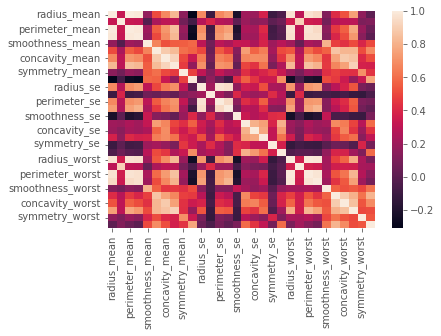

In [70]:
sns.heatmap(data.corr())

In [71]:
X = data.drop(labels=["diagnosis"],axis=1)
y = data.diagnosis

In [72]:
X

radius_mean  texture_mean  perimeter_mean  area_mean  smoothness_mean  \
0          17.99         10.38          122.80     1001.0          0.11840   
1          20.57         17.77          132.90     1326.0          0.08474   
2          19.69         21.25          130.00     1203.0          0.10960   
3          11.42         20.38           77.58      386.1          0.14250   
4          20.29         14.34          135.10     1297.0          0.10030   
..           ...           ...             ...        ...              ...   
564        21.56         22.39          142.00     1479.0          0.11100   
565        20.13         28.25          131.20     1261.0          0.09780   
566        16.60         28.08          108.30      858.1          0.08455   
567        20.60         29.33          140.10     1265.0          0.11780   
568         7.76         24.54           47.92      181.0          0.05263   

     compactness_mean  concavity_mean  concave points_mean  symmetry_mean  \
0             0.27760         0.30010              0.14710         0.2419   
1             0.07864         0.08690              0.07017         0.1812   
2             0.15990         0.19740              0.12790         0.2069   
3             0.28390         0.24140              0.10520         0.2597   
4             0.13280         0.19800              0.10430         0.1809   
..                ...             ...                  ...            ...   
564           0.11590         0.24390              0.13890         0.1726   
565           0.10340         0.14400              0.09791         0.1752   
566           0.10230         0.09251              0.05302         0.1590   
567           0.27700         0.35140              0.15200         0.2397   
568           0.04362         0.00000              0.00000         0.1587   

     fractal_dimension_mean  radius_se  texture_se  perimeter_se  area_se  \
0                   0.07871     1.0950      0.9053         8.589   153.40   
1                   0.05667     0.5435      0.7339         3.398    74.08   
2                   0.05999     0.7456      0.7869         4.585    94.03   
3                   0.09744     0.4956      1.1560         3.445    27.23   
4                   0.05883     0.7572      0.7813         5.438    94.44   
..                      ...        ...         ...           ...      ...   
564                 0.05623     1.1760      1.2560         7.673   158.70   
565                 0.05533     0.7655      2.4630         5.203    99.04   
566                 0.05648     0.4564      1.0750         3.425    48.55   
567                 0.07016     0.7260      1.5950         5.772    86.22   
568                 0.05884     0.3857      1.4280         2.548    19.15   

     smoothness_se  compactness_se  concavity_se  concave points_se  \
0         0.006399         0.04904       0.05373            0.01587   
1         0.005225         0.01308       0.01860            0.01340   
2         0.006150         0.04006       0.03832            0.02058   
3         0.009110         0.07458       0.05661            0.01867   
4         0.011490         0.02461       0.05688            0.01885   
..             ...             ...           ...                ...   
564       0.010300         0.02891       0.05198            0.02454   
565       0.005769         0.02423       0.03950            0.01678   
566       0.005903         0.03731       0.04730            0.01557   
567       0.006522         0.06158       0.07117            0.01664   
568       0.007189         0.00466       0.00000            0.00000   

     symmetry_se  fractal_dimension_se  radius_worst  texture_worst  \
0        0.03003              0.006193        25.380          17.33   
1        0.01389              0.003532        24.990          23.41   
2        0.02250              0.004571        23.570          25.53   
3        0.05963              0.009208        14.910          26.50   
4        0

In [73]:
from sklearn.preprocessing import LabelEncoder,Binarizer,MinMaxScaler,OneHotEncoder
from sklearn.decomposition import PCA
from sklearn.feature_selection import chi2,f_classif,f_regression,SelectKBest

In [74]:
## Now, convert the target variable to numerical
target = LabelEncoder().fit_transform(y)
target

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,

In [75]:
from sklearn.model_selection import train_test_split
X_train,X_test, y_train,y_test = train_test_split(X,target, train_size=0.80,random_state=42)

In [76]:
print("X_train Shape: ", X_train.shape)
print("X_test Shape: ", X_test.shape)
print("y_train Shape: ", y_train.shape)
print("y_test Shape: ", y_test.shape)

X_train Shape:  (455, 30)
X_test Shape:  (114, 30)
y_train Shape:  (455,)
y_test Shape:  (114,)


In [77]:
def feature_selection(X_train,y_train,X_test):
    feature_selection = SelectKBest(score_func=f_regression,k="all")
    feature_selection.fit(x_train,y_train)
    x_train_fs = feature_selection.transform(x_train)
    x_test_fs = feature_selection.transform(x_test)
    return x_train_fs, x_test_fs, feature_selection

In [78]:
# example of correlation feature selection for numerical data
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
from matplotlib import pyplot


# feature selection
def select_features(X_train, y_train, X_test):
    # configure to select all features
    fs = SelectKBest(score_func=f_regression, k='all')
    # learn relationship from training data
    fs.fit(X_train, y_train)
    # transform train input data
    X_train_fs = fs.transform(X_train)
    # transform test input data
    X_test_fs = fs.transform(X_test)
    return X_train_fs, X_test_fs, fs

# feature selection
X_train_fs, X_test_fs, fs = select_features(X_train, y_train, X_test)

###### Vasualizationg of the best columns 
* Top 10 columns ranking

Feature 0: 482.233945
Feature 1: 94.917788
Feature 2: 522.489267
Feature 3: 423.654133
Feature 4: 74.190147
Feature 5: 242.589647
Feature 6: 396.662370
Feature 7: 695.179785
Feature 8: 62.469542
Feature 9: 0.092756
Feature 10: 186.591816
Feature 11: 0.004714
Feature 12: 176.223231
Feature 13: 165.307401
Feature 14: 1.535574
Feature 15: 31.338791
Feature 16: 22.179613
Feature 17: 76.565923
Feature 18: 0.010104
Feature 19: 0.790104
Feature 20: 645.350668
Feature 21: 126.681903
Feature 22: 681.263759
Feature 23: 495.787667
Feature 24: 102.973429
Feature 25: 240.492785
Feature 26: 331.330906
Feature 27: 746.492117
Feature 28: 108.953927
Feature 29: 49.197922


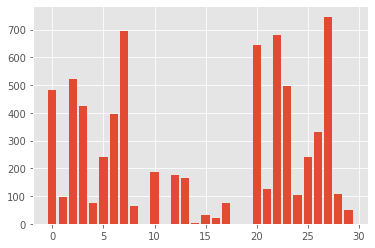

In [79]:
for i in range(len(fs.scores_)):
    print('Feature %d: %f' % (i, fs.scores_[i])) 
# plot the scores
pyplot.bar([i for i in range(len(fs.scores_))], fs.scores_)
pyplot.show()

#### Feature Engineering
* chi2 method

In [80]:
Chi_score = chi2(X,y)

<AxesSubplot:>

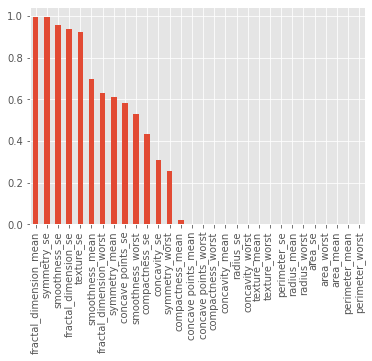

In [81]:
Chi_score
p_values = pd.Series(Chi_score[1],index = X.columns)
p_values.sort_values(ascending = False , inplace = True)
p_values.plot.bar()

###### New Data Variable 
* By dropping less revelance feature

In [82]:
X.columns

Index(['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [83]:
X_new = pd.DataFrame(X,columns=["fractal_dimension_mean","symmetry_se","smoothness_se","fractal_dimension_se",
                               "texture_se","smoothness_mean","fractal_dimension_worst","symmetry_mean",
                               "concave points_mean","smoothness_worst","compactness_se","symmetry_worst"])

In [84]:
X_new

fractal_dimension_mean  symmetry_se  smoothness_se  fractal_dimension_se  \
0                   0.07871      0.03003       0.006399              0.006193   
1                   0.05667      0.01389       0.005225              0.003532   
2                   0.05999      0.02250       0.006150              0.004571   
3                   0.09744      0.05963       0.009110              0.009208   
4                   0.05883      0.01756       0.011490              0.005115   
..                      ...          ...            ...                   ...   
564                 0.05623      0.01114       0.010300              0.004239   
565                 0.05533      0.01898       0.005769              0.002498   
566                 0.05648      0.01318       0.005903              0.003892   
567                 0.07016      0.02324       0.006522              0.006185   
568                 0.05884      0.02676       0.007189              0.002783   

     texture_se  smoothness_mean  fractal_dimension_worst  symmetry_mean  \
0        0.9053          0.11840                  0.11890         0.2419   
1        0.7339          0.08474                  0.08902         0.1812   
2        0.7869          0.10960                  0.08758         0.2069   
3        1.1560          0.14250                  0.17300         0.2597   
4        0.7813          0.10030                  0.07678         0.1809   
..          ...              ...                      ...            ...   
564      1.2560          0.11100                  0.07115         0.1726   
565      2.4630          0.09780                  0.06637         0.1752   
566      1.0750          0.08455                  0.07820         0.1590   
567      1.5950          0.11780                  0.12400         0.2397   
568      1.4280          0.05263                  0.07039         0.1587   

     concave points_mean  smoothness_worst  compactness_se  symmetry_worst  
0                0.14710           0.16220         0.04904          0.4601  
1                0.07017           0.12380         0.01308          0.2750  
2                0.12790           0.14440         0.04006          0.3613  
3                0.10520           0.20980         0.07458          0.6638  
4                0.10430           0.13740         0.02461          0.2364  
..                   ...               ...             ...             ...  
564              0.13890           0.14100         0.02891          0.2060  
565              0.09791           0.11660         0.02423          0.2572  
566              0.05302           0.11390         0.03731          0.2218  
567              0.15200           0.16500         0.06158          0.4087  
568              0.00000           0.08996         0.00466          0.2871  

[569 rows x 12 columns]

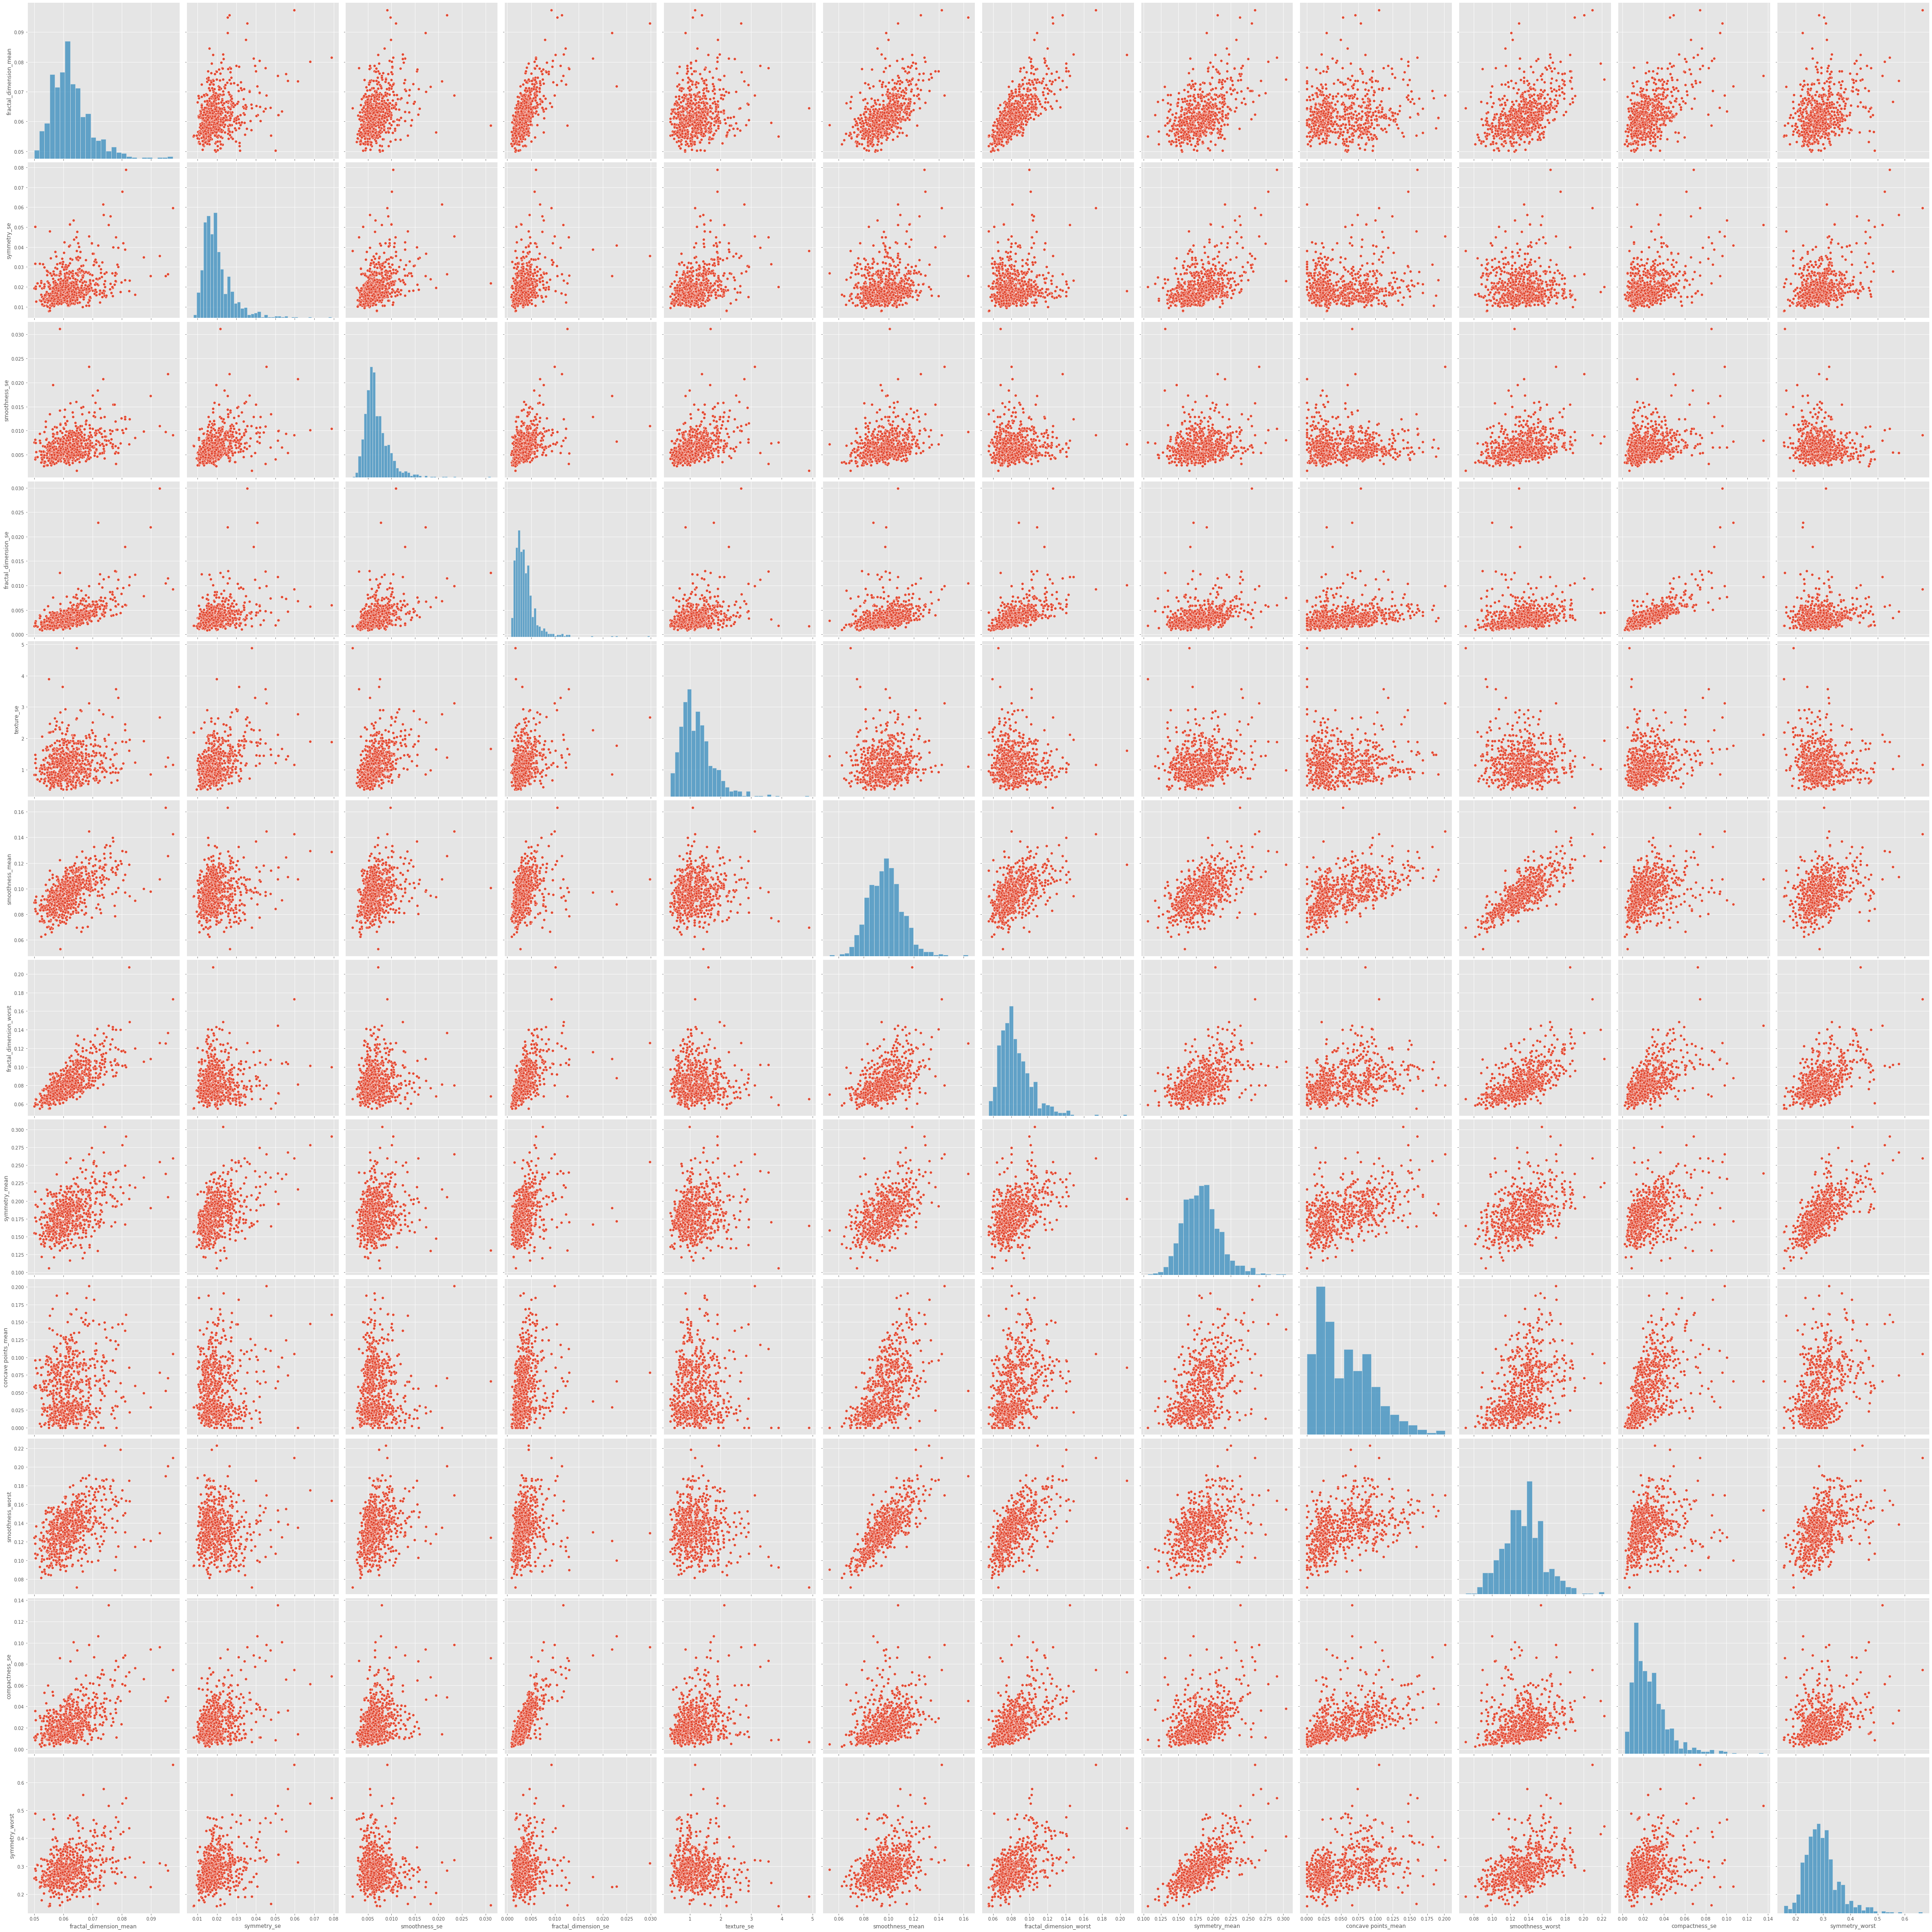

In [232]:
sns.pairplot(X_new,height=5)

In [85]:
X_train,X_test,y_train,y_test = train_test_split(X_new,target,train_size=0.8,random_state=123)

In [86]:
print("X_train shape ", X_train.shape)
print("X_test shape ", X_test.shape)
print("y_train shape ", y_train.shape)
print("y_test shape ", y_test.shape)

X_train shape  (455, 12)
X_test shape  (114, 12)
y_train shape  (455,)
y_test shape  (114,)


###### Data sampling and resampling 
* Generate more artificial data from smote library

In [87]:
from imblearn.over_sampling import SMOTE
oversample = SMOTE(random_state=42)
X_new, y_new = oversample.fit_resample(X_new,target)

In [88]:
print("Shape of X before sampling :", X_new.shape)
print("Shape of y before sampling :", y.shape)
print("Shape of X after sampling :", X_new.shape)
print("Shape of X before sampling :", y_new.shape)

Shape of X before sampling : (714, 12)
Shape of y before sampling : (569,)
Shape of X after sampling : (714, 12)
Shape of X before sampling : (714,)


In [89]:
X_new_train, X_new_test, y_new_train, y_new_test = train_test_split(X_new, y_new, train_size=0.8, random_state=42)

In [90]:
print("Shape of X_new_train :", X_new_train.shape)
print("Shape of X_new_test :", X_new_test.shape)
print("Shape of y_new_train :", y_new_train.shape)
print("Shape of y_new_test :", y_new_test.shape)

Shape of X_new_train : (571, 12)
Shape of X_new_test : (143, 12)
Shape of y_new_train : (571,)
Shape of y_new_test : (143,)


##### MODEL 1 - Deploying model using J48 Decision Tree 
* Before Data Augmentation

In [91]:
%%time 
# Before Data Augmentation
# Decision tree with depth = 4
model_dt = DecisionTreeClassifier(random_state=42,max_depth=4)
model_dt.fit(X_train, y_train)
model_dt_score_train = model_dt.score(X_train, y_train)
print("Training score: ",model_dt_score_train)
model_dt_score_test = model_dt.score(X_test, y_test)
print("Testing score: ",model_dt_score_test)

Training score:  0.9494505494505494
Testing score:  0.8947368421052632
Wall time: 16 ms


* Decision with Hyperparameters using GridSearch CV

In [92]:
#Custom GridSearch Parameters

decisionT_params = {
                'criterion':['gini','entropy'],
                'min_samples_split': range(1,10),
                'max_depth':range(1,10), 
                'min_samples_leaf':range(1,5)
                    }

In [93]:
grid_search_cv = GridSearchCV(DecisionTreeClassifier(random_state=42), decisionT_params, verbose=1, cv=5)

In [94]:
#Fitting all the GridSearch parameters combinations to X_train and y_train
grid_search_cv.fit(X_train, y_train)

Fitting 5 folds for each of 648 candidates, totalling 3240 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(1, 10),
                         'min_samples_leaf': range(1, 5),
                         'min_samples_split': range(1, 10)},
             verbose=1)

In [95]:
## Best estimator of the J48 decision tree
grid_search_cv.best_estimator_

DecisionTreeClassifier(max_depth=1, random_state=42)

In [96]:
%%time 
model_dt = DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_leaf=2,
                       random_state=42,min_samples_split=6)
model_dt.fit(X_train, y_train)
model_dt_score_train = model_dt.score(X_train, y_train)
print("Training score: ",model_dt_score_train)
model_dt_score_test = model_dt.score(X_test, y_test)
print("Testing score: ",model_dt_score_test)

Training score:  0.9604395604395605
Testing score:  0.868421052631579
Wall time: 22.2 ms


In [97]:
#Predicting the y_pred using model object

y_pred_dt = model_dt.predict_proba(X_test)[:, 1]

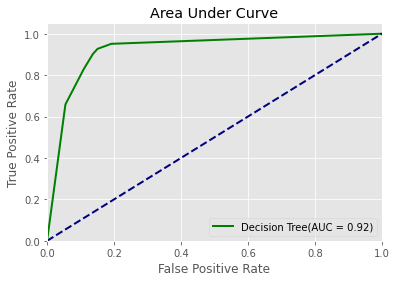

In [98]:
fpr_dt, tpr_dt, _ = roc_curve(y_test, y_pred_dt)
roc_auc_dt = auc(fpr_dt, tpr_dt)
plt.figure(1)
lw = 2
plt.plot(fpr_dt, tpr_dt, color='green',
         lw=lw, label='Decision Tree(AUC = %0.2f)' % roc_auc_dt)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Area Under Curve')
plt.legend(loc="lower right")
plt.show()

In [99]:
###############################################################
##                                                           ##
##    This function prints and plots the confusion matrix.   ##
##                                                           ##
###############################################################

import itertools
from sklearn.metrics import confusion_matrix
def plot_confusion_matrix(model, normalize=False): 
    cm = confusion_matrix(y_test, model, labels=[0, 1])
    classes=["Benign 0", "Malignant Clas 1"]
    cmap = plt.cm.Blues
    title = "Confusion Matrix"
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        cm = np.around(cm, decimals=3)
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

* Confusion Matrix

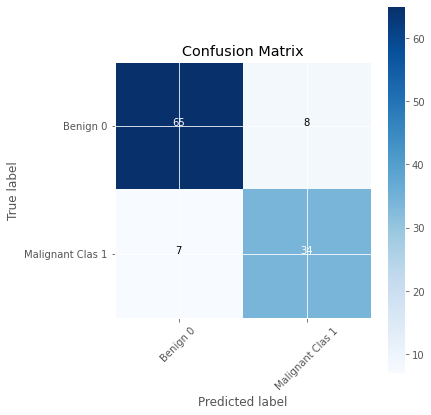

In [100]:
predictions = model_dt.predict(X_test)
plt.figure(figsize=(6,6))
plot_confusion_matrix(predictions,normalize=False)
plt.show()

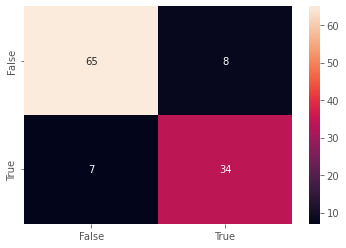

In [101]:
mat = confusion_matrix(y_test,predictions)
ax = sns.heatmap(mat,annot=True)
## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

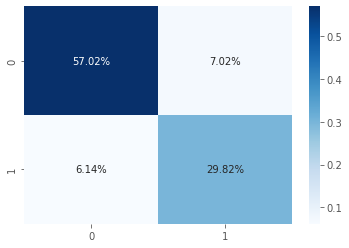

In [102]:
ax = sns.heatmap(mat/np.sum(mat), annot=True,fmt='.2%', cmap='Blues')

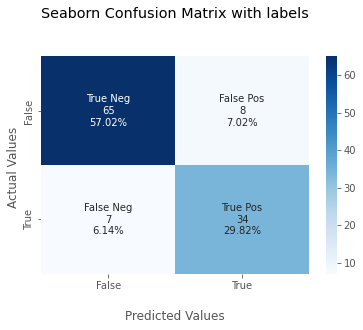

In [103]:
group_names = ['True Neg','False Pos','False Neg','True Pos']

group_counts = ["{0:0.0f}".format(value) for value in
                mat.flatten()]

group_percentages = ["{0:.2%}".format(value) for value in
                     mat.flatten()/np.sum(mat)]

labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]

labels = np.asarray(labels).reshape(2,2)

ax = sns.heatmap(mat, annot=labels, fmt='', cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

In [104]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, predictions), ": is the confusion matrix")
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, predictions), ": is the accuracy score")
from sklearn.metrics import precision_score
print(precision_score(y_test, predictions), ": is the precision score")
from sklearn.metrics import recall_score
print(recall_score(y_test, predictions), ": is the recall score")
from sklearn.metrics import f1_score
print(f1_score(y_test, predictions), ": is the f1 score")

[[65  8]
 [ 7 34]] : is the confusion matrix
0.868421052631579 : is the accuracy score
0.8095238095238095 : is the precision score
0.8292682926829268 : is the recall score
0.8192771084337348 : is the f1 score


* After data Augmentation

In [105]:
%%time
# After Data Augmentation
# Decision tree with depth = 4
model_dt = DecisionTreeClassifier(random_state=42,max_depth=4)
model_dt.fit(X_new_train, y_new_train)
model_dt_score_train = model_dt.score(X_new_train, y_new_train)
print("Training score: ",model_dt_score_train)
model_dt_score_test = model_dt.score(X_new_test, y_new_test)
print("Testing score: ",model_dt_score_test)

Training score:  0.9492119089316988
Testing score:  0.8811188811188811
Wall time: 16 ms


* Decision with Hyperparameters using GridSearch CV

In [106]:
decisionT_params = {
                'criterion':['gini','entropy'],
                'min_samples_split': range(1,10),
                'max_depth':range(1,10), 
                'min_samples_leaf':range(1,5)
                    }

In [107]:
grid_search_cv = GridSearchCV(DecisionTreeClassifier(random_state=42), decisionT_params, verbose=1, cv=5)

In [108]:
#Fitting all the GridSearch parameters combinations to X_train and y_train
grid_search_cv.fit(X_new_train, y_new_train)

Fitting 5 folds for each of 648 candidates, totalling 3240 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(1, 10),
                         'min_samples_leaf': range(1, 5),
                         'min_samples_split': range(1, 10)},
             verbose=1)

In [109]:
## Best estimator of the J48 decision tree
grid_search_cv.best_estimator_

DecisionTreeClassifier(criterion='entropy', max_depth=6, min_samples_leaf=2,
                       min_samples_split=7, random_state=42)

In [110]:
%%time 
model_dt = DecisionTreeClassifier(criterion='entropy', max_depth=4, min_samples_leaf=3,
                       random_state=42,min_samples_split=6)
model_dt.fit(X_new_train, y_new_train)
model_dt_score_train = model_dt.score(X_new_train, y_new_train)
print("Training score: ",model_dt_score_train)
model_dt_score_test = model_dt.score(X_new_test, y_new_test)
print("Testing score: ",model_dt_score_test) 

Training score:  0.9387040280210157
Testing score:  0.8601398601398601
Wall time: 24 ms


In [111]:
#Predicting the y_pred using model object

y_pred_dt = model_dt.predict_proba(X_new_test)[:, 1]

* Visualization

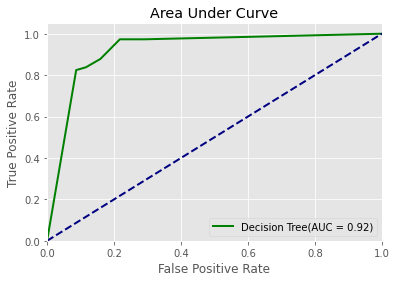

In [112]:
fpr_dt, tpr_dt, _ = roc_curve(y_new_test, y_pred_dt)
roc_auc_dt = auc(fpr_dt, tpr_dt)
plt.figure(1)
lw = 2
plt.plot(fpr_dt, tpr_dt, color='green',
         lw=lw, label='Decision Tree(AUC = %0.2f)' % roc_auc_dt)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Area Under Curve')
plt.legend(loc="lower right")
plt.show()

In [113]:
###############################################################
##                                                           ##
##    This function prints and plots the confusion matrix.   ##
##                                                           ##
###############################################################

import itertools
from sklearn.metrics import confusion_matrix
def plot_confusion_matrix(model, normalize=False): 
    cm = confusion_matrix(y_new_test, model, labels=[0, 1])
    classes=["Benign Clas 0", "Malignant Clas 1"]
    cmap = plt.cm.Blues
    title = "Confusion Matrix"
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        cm = np.around(cm, decimals=3)
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

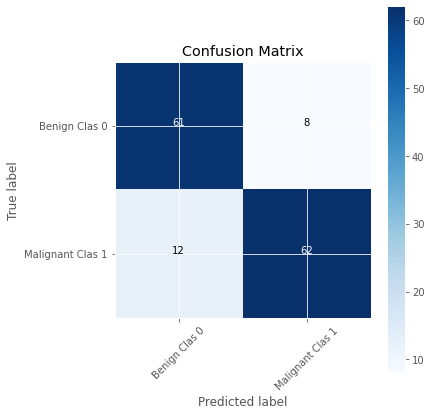

In [114]:
predictions = model_dt.predict(X_new_test)
plt.figure(figsize=(6,6))
plot_confusion_matrix(predictions, normalize=False)
plt.show()

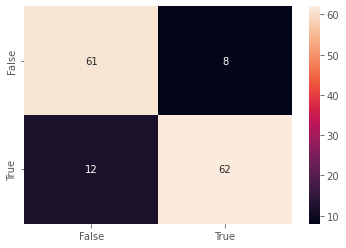

In [115]:
mat = confusion_matrix(y_new_test,predictions)
ax = sns.heatmap(mat,annot=True)
## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

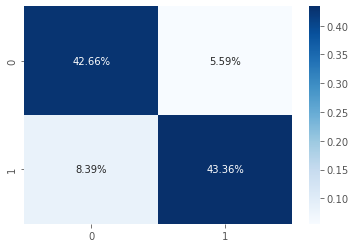

In [116]:
ax = sns.heatmap(mat/np.sum(mat), annot=True,fmt='.2%', cmap='Blues')

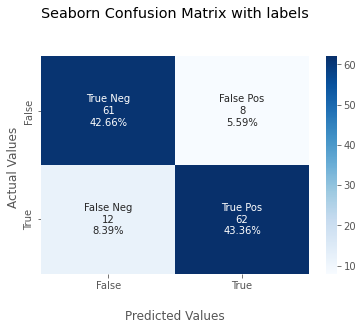

In [117]:
group_names = ['True Neg','False Pos','False Neg','True Pos']

group_counts = ["{0:0.0f}".format(value) for value in
                mat.flatten()]

group_percentages = ["{0:.2%}".format(value) for value in
                     mat.flatten()/np.sum(mat)]

labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]

labels = np.asarray(labels).reshape(2,2)

ax = sns.heatmap(mat, annot=labels, fmt='', cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

In [118]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_new_test, predictions), ": is the confusion matrix")
from sklearn.metrics import accuracy_score
print(accuracy_score(y_new_test, predictions), ": is the accuracy score")
from sklearn.metrics import precision_score
print(precision_score(y_new_test, predictions), ": is the precision score")
from sklearn.metrics import recall_score
print(recall_score(y_new_test, predictions), ": is the recall score")
from sklearn.metrics import f1_score
print(f1_score(y_new_test, predictions), ": is the f1 score") 

[[61  8]
 [12 62]] : is the confusion matrix
0.8601398601398601 : is the accuracy score
0.8857142857142857 : is the precision score
0.8378378378378378 : is the recall score
0.8611111111111112 : is the f1 score


###### Model 2: Random Forest Classifier
* Before Data Augmentation
- Using Default parameter of the random forest

In [119]:
fit_rf = RandomForestClassifier(random_state=97,criterion='entropy', max_depth=5,n_estimators=15,) 

In [120]:
%%time
model_dt = fit_rf 
model_dt.fit(X_train, y_train)
model_dt_score_train = model_dt.score(X_train, y_train)
print("Training score: ",model_dt_score_train)
model_dt_score_test = model_dt.score(X_test, y_test)
print("Testing score: ",model_dt_score_test) 

Training score:  0.9692307692307692
Testing score:  0.9210526315789473
Wall time: 88 ms


* Random Forest with GridSearch CV

In [121]:
np.random.seed(42)
start = time.time()

param_dist = {'max_depth': range(1,6),
              'bootstrap': [True, False],
              'max_features': ['auto', 'sqrt', 'log2', None],
              'criterion': ['gini', 'entropy']}

cv_rf = GridSearchCV(fit_rf, cv = 10,
                     param_grid=param_dist, 
                     n_jobs = 3)

cv_rf.fit(X_train, y_train)
print('Best Parameters using grid search: \n', cv_rf.best_params_)
end = time.time()
print('Time taken in grid search: {0: .2f}'.format(end - start))

Best Parameters using grid search: 
 {'bootstrap': True, 'criterion': 'entropy', 'max_depth': 5, 'max_features': None}
Time taken in grid search:  31.40


In [122]:
# Set best parameters given by grid search 
fit_rf.set_params(criterion = 'entropy',
                  max_features = 'auto', 
                  max_depth = 2,
                 bootstrap = True) 

RandomForestClassifier(criterion='entropy', max_depth=2, n_estimators=15,
                       random_state=97)

In [123]:
fit_rf.set_params(warm_start=True, 
                  oob_score=True)

min_estimators = 15
max_estimators = 1000

error_rate = {}

for i in range(min_estimators, max_estimators + 1):
    fit_rf.set_params(n_estimators=i)
    fit_rf.fit(X_train, y_train)

    oob_error = 1 - fit_rf.oob_score_
    error_rate[i] = oob_error

In [124]:
# Convert dictionary to a pandas series for easy plotting 
oob_series = pd.Series(error_rate)

Wall time: 65.1 ms


Text(0.5, 1.0, 'OOB Error Rate Across various Forest sizes \n(From 15 to 1000 trees)')

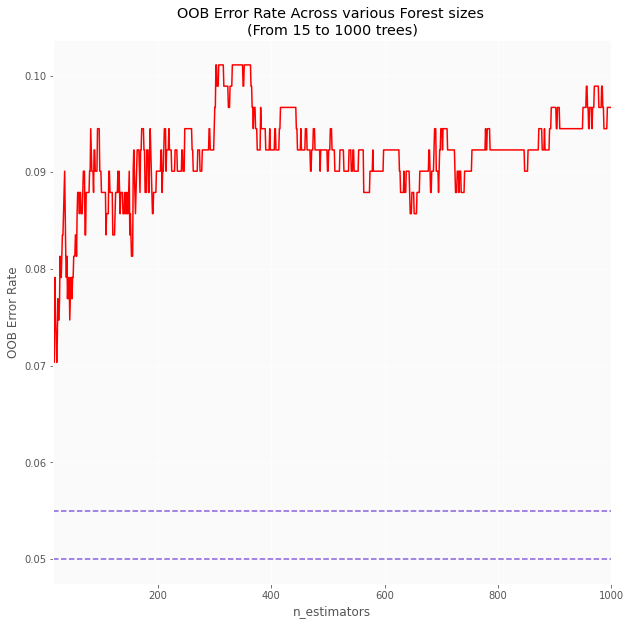

In [125]:
%%time
fig, ax = plt.subplots(figsize=(10, 10))

ax.set_facecolor('#fafafa')

oob_series.plot(kind='line',color = 'red')
plt.axhline(0.055, color='#875FDB',linestyle='--')
plt.axhline(0.05, color='#875FDB',linestyle='--')
plt.xlabel('n_estimators')
plt.ylabel('OOB Error Rate')
plt.title('OOB Error Rate Across various Forest sizes \n(From 15 to 1000 trees)')

In [126]:
print('OOB Error rate for 400 trees is: {0:.5f}'.format(oob_series[600]))

OOB Error rate for 400 trees is: 0.09231


In [127]:
# Refine the tree via OOB Output
fit_rf.set_params(n_estimators=100,
                  bootstrap = True,
                  warm_start=False, 
                  oob_score=False)

RandomForestClassifier(criterion='entropy', max_depth=2, random_state=97)

In [128]:
fit_rf.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', max_depth=2, random_state=97)

In [129]:
predictions_rf = fit_rf.predict(X_test)

In [130]:
###############################################################
##                                                           ##
##    This function prints and plots the confusion matrix.   ##
##                                                           ##
###############################################################

import itertools
from sklearn.metrics import confusion_matrix
def plot_confusion_matrix(model, normalize=False): 
    cm = confusion_matrix(y_test, model, labels=[0, 1])
    classes=["Benign Clas 0", "Malignant Clas 1"]
    cmap = plt.cm.Blues
    title = "Confusion Matrix"
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        cm = np.around(cm, decimals=3)
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

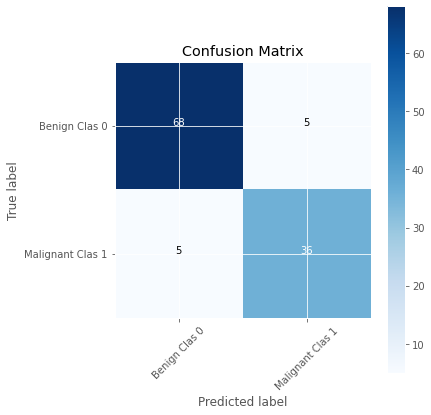

In [131]:
predictions = fit_rf.predict(X_test)
plt.figure(figsize=(6,6))
plot_confusion_matrix(predictions, normalize=False)
plt.show()

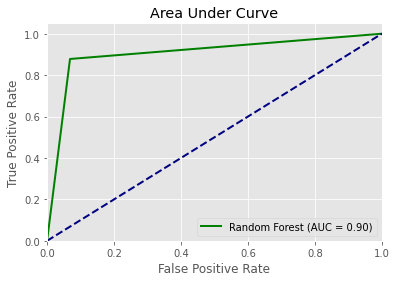

In [132]:
### Area Under the curve
fpr_dt, tpr_dt, _ = roc_curve(y_test,predictions)
roc_auc_dt = auc(fpr_dt, tpr_dt)
plt.figure(1)
lw = 2
plt.plot(fpr_dt, tpr_dt, color='green',
         lw=lw, label='Random Forest (AUC = %0.2f)' % roc_auc_dt)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Area Under Curve')
plt.legend(loc="lower right")
plt.show()

<AxesSubplot:>

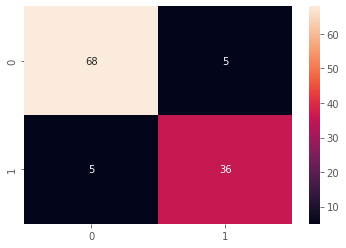

In [133]:
mat = confusion_matrix(y_test, predictions, normalize=None)
sns.heatmap(mat,annot=True)

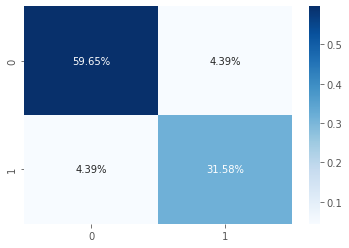

In [134]:
ax = sns.heatmap(mat/np.sum(mat), annot=True,fmt='.2%', cmap='Blues')

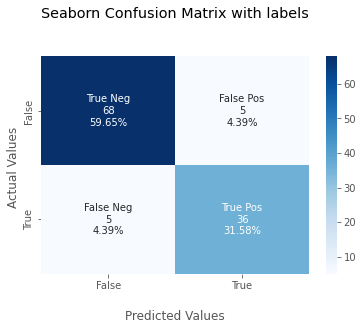

In [135]:
group_names = ['True Neg','False Pos','False Neg','True Pos']

group_counts = ["{0:0.0f}".format(value) for value in
                mat.flatten()]

group_percentages = ["{0:.2%}".format(value) for value in
                     mat.flatten()/np.sum(mat)]

labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]

labels = np.asarray(labels).reshape(2,2)

ax = sns.heatmap(mat, annot=labels, fmt='', cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

In [136]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, predictions_rf), ": is the confusion matrix")
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, predictions_rf), ": is the accuracy score")
from sklearn.metrics import precision_score
print(precision_score(y_test, predictions_rf), ": is the precision score")
from sklearn.metrics import recall_score
print(recall_score(y_test, predictions_rf), ": is the recall score")
from sklearn.metrics import f1_score
print(f1_score(y_test, predictions_rf), ": is the f1 score") 

[[68  5]
 [ 5 36]] : is the confusion matrix
0.9122807017543859 : is the accuracy score
0.8780487804878049 : is the precision score
0.8780487804878049 : is the recall score
0.8780487804878049 : is the f1 score


* After Data Augmentation

In [137]:
fit_rf = RandomForestClassifier(random_state=97,criterion='entropy', max_depth=5,n_estimators=15,) 

In [138]:
%%time
model_dt = fit_rf 
model_dt.fit(X_new_train, y_new_train)
model_dt_score_train = model_dt.score(X_new_train, y_new_train)
print("Training score: ",model_dt_score_train)
model_dt_score_test = model_dt.score(X_new_test, y_new_test)
print("Testing score: ",model_dt_score_test) 

Training score:  0.9754816112084063
Testing score:  0.9090909090909091
Wall time: 100 ms


* Random Forest with GridSearch CV

In [139]:
np.random.seed(42)
start = time.time()

param_dist = {'max_depth': range(1,6),
              'bootstrap': [True, False],
              'max_features': ['auto', 'sqrt', 'log2', None],
              'criterion': ['gini', 'entropy']}

cv_rf = GridSearchCV(fit_rf, cv = 10,
                     param_grid=param_dist, 
                     n_jobs = 3)

cv_rf.fit(X_new_train, y_new_train)
print('Best Parameters using grid search: \n', cv_rf.best_params_)
end = time.time()
print('Time taken in grid search: {0: .2f}'.format(end - start))

Best Parameters using grid search: 
 {'bootstrap': True, 'criterion': 'entropy', 'max_depth': 5, 'max_features': 'auto'}
Time taken in grid search:  32.99


In [140]:
# Set best parameters given by grid search 
fit_rf.set_params(criterion = 'entropy',
                  max_features = 'auto', 
                  max_depth = 4,
                 bootstrap = True)

RandomForestClassifier(criterion='entropy', max_depth=4, n_estimators=15,
                       random_state=97)

In [141]:
fit_rf.set_params(warm_start=True, 
                  oob_score=True)

min_estimators = 15
max_estimators = 1000

error_rate = {}

for i in range(min_estimators, max_estimators + 1):
    fit_rf.set_params(n_estimators=i)
    fit_rf.fit(X_new_train, y_new_train)

    oob_error = 1 - fit_rf.oob_score_
    error_rate[i] = oob_error

In [142]:
# Convert dictionary to a pandas series for easy plotting 
oob_series = pd.Series(error_rate)

Wall time: 56 ms


Text(0.5, 1.0, 'OOB Error Rate Across various Forest sizes \n(From 15 to 1000 trees)')

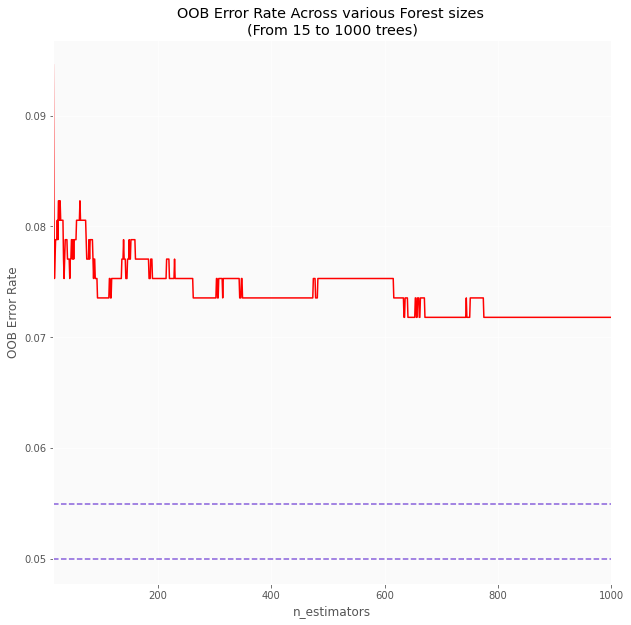

In [143]:
%%time
fig, ax = plt.subplots(figsize=(10, 10))

ax.set_facecolor('#fafafa')

oob_series.plot(kind='line',color = 'red')
plt.axhline(0.055, color='#875FDB',linestyle='--')
plt.axhline(0.05, color='#875FDB',linestyle='--')
plt.xlabel('n_estimators')
plt.ylabel('OOB Error Rate')
plt.title('OOB Error Rate Across various Forest sizes \n(From 15 to 1000 trees)')

In [144]:
print('OOB Error rate for 400 trees is: {0:.5f}'.format(oob_series[600]))

OOB Error rate for 400 trees is: 0.07531


In [145]:
# Refine the tree via OOB Output
fit_rf.set_params(n_estimators=100,
                  bootstrap = True,
                  warm_start=False, 
                  oob_score=False)

RandomForestClassifier(criterion='entropy', max_depth=4, random_state=97)

In [146]:
fit_rf.fit(X_new_train, y_new_train)

RandomForestClassifier(criterion='entropy', max_depth=4, random_state=97)

In [147]:
predictions_rf = fit_rf.predict(X_new_test)

#### Printing confusion matrix for Random Forest Classifier

In [148]:
###############################################################
##                                                           ##
##    This function prints and plots the confusion matrix.   ##
##                                                           ##
###############################################################

import itertools
from sklearn.metrics import confusion_matrix
def plot_confusion_matrix_Dat(model, normalize=False): 
    cm = confusion_matrix(y_new_test, model, labels=[0, 1])
    classes=["Experimental Clas 0", "Experimental Clas 1"]
    cmap = plt.cm.Blues
    title = "Confusion Matrix"
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        cm = np.around(cm, decimals=3)
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

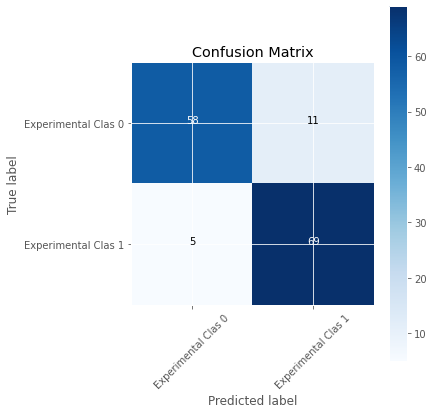

In [149]:
predictions = fit_rf.predict(X_new_test)
plt.figure(figsize=(6,6))
plot_confusion_matrix_Dat(predictions, normalize=False)
plt.show()

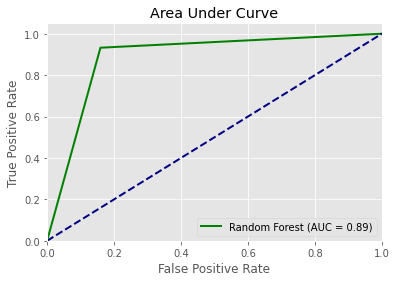

In [150]:
### Area Under the curve
fpr_dt, tpr_dt, _ = roc_curve(y_new_test,predictions)
roc_auc_dt = auc(fpr_dt, tpr_dt)
plt.figure(1)
lw = 2
plt.plot(fpr_dt, tpr_dt, color='green',
         lw=lw, label='Random Forest (AUC = %0.2f)' % roc_auc_dt)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Area Under Curve')
plt.legend(loc="lower right")
plt.show()

<AxesSubplot:>

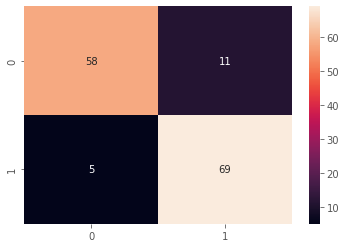

In [151]:
mat = confusion_matrix(y_new_test, predictions, normalize=None)
sns.heatmap(mat,annot=True)

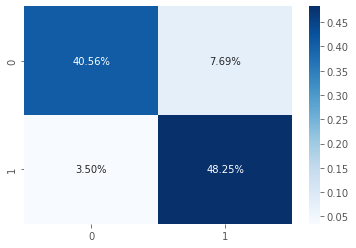

In [152]:
ax = sns.heatmap(mat/np.sum(mat), annot=True,fmt='.2%', cmap='Blues')

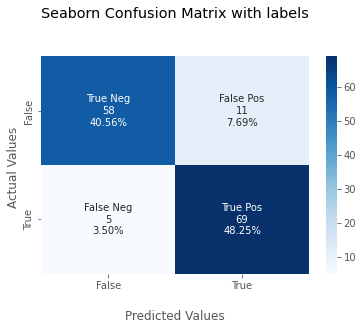

In [153]:
group_names = ['True Neg','False Pos','False Neg','True Pos']

group_counts = ["{0:0.0f}".format(value) for value in
                mat.flatten()]

group_percentages = ["{0:.2%}".format(value) for value in
                     mat.flatten()/np.sum(mat)]

labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]

labels = np.asarray(labels).reshape(2,2)

ax = sns.heatmap(mat, annot=labels, fmt='', cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

In [154]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_new_test, predictions_rf), ": is the confusion matrix")
from sklearn.metrics import accuracy_score
print(accuracy_score(y_new_test, predictions_rf), ": is the accuracy score")
from sklearn.metrics import precision_score
print(precision_score(y_new_test, predictions_rf), ": is the precision score")
from sklearn.metrics import recall_score
print(recall_score(y_new_test, predictions_rf), ": is the recall score")
from sklearn.metrics import f1_score
print(f1_score(y_new_test, predictions_rf), ": is the f1 score") 

[[58 11]
 [ 5 69]] : is the confusion matrix
0.8881118881118881 : is the accuracy score
0.8625 : is the precision score
0.9324324324324325 : is the recall score
0.8961038961038962 : is the f1 score


##### Model 3: Naive Bayes
* Before Data Augmentation
- Modelling using Bayes with default parameters

In [155]:
import sklearn
from sklearn.metrics import accuracy_score

In [156]:
%%time
# Init the Gaussian Classifier
model = GaussianNB()

# Train the model
model.fit(X_train, y_train)
# Predict Output 
pred = model.predict(X_test) 
print("Accuracy:",accuracy_score(pred,y_test))

Accuracy: 0.8859649122807017
Wall time: 8 ms


[]

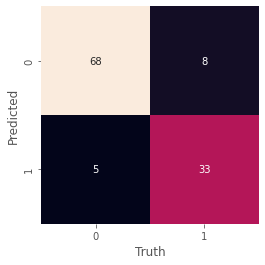

In [157]:
# Plot Confusion Matrix
# plt.figure(figsize=(10,8))
mat = confusion_matrix(pred, y_test)
names = np.unique(pred)
sns.heatmap(mat, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=names, yticklabels=names)
plt.xlabel('Truth')
plt.ylabel('Predicted')
plt.plot()

#### Applying Gausian Naive Bayes using GridSearchCV/

In [158]:
param_grid_nb = {
    'var_smoothing': np.logspace(0,-9, num=100)
}

In [159]:
%%time
nb_classifier = GaussianNB()

params_NB = {'var_smoothing': np.logspace(0,-9, num=100)}
gs_NB = GridSearchCV(estimator=nb_classifier, 
                 param_grid=params_NB, 
                 cv=4,   # use any cross validation technique 
                 verbose=1, 
                 scoring='accuracy') 
gs_NB.fit(X_train, y_train)
gs_NB.best_params_ 

Fitting 4 folds for each of 100 candidates, totalling 400 fits
Wall time: 3.36 s


{'var_smoothing': 1.873817422860383e-06}

In [160]:
y_pred = gs_NB.predict(X_test)

In [161]:
%%time
# Decision tree with depth = 4
model_nb_score_train = gs_NB.score(X_train, y_train)
print("Training score: ",model_nb_score_train)
model_nb_score_test = gs_NB.score(X_test, y_test)
print("Testing score: ",model_nb_score_test)

Training score:  0.8791208791208791
Testing score:  0.8859649122807017
Wall time: 8 ms


In [162]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pred), ": is the confusion matrix")
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred), ": is the accuracy score")
from sklearn.metrics import precision_score
print(precision_score(y_test, y_pred), ": is the precision score")
from sklearn.metrics import recall_score
print(recall_score(y_test, y_pred), ": is the recall score")
from sklearn.metrics import f1_score
print(f1_score(y_test, y_pred), ": is the f1 score")

[[68  5]
 [ 8 33]] : is the confusion matrix
0.8859649122807017 : is the accuracy score
0.868421052631579 : is the precision score
0.8048780487804879 : is the recall score
0.8354430379746836 : is the f1 score


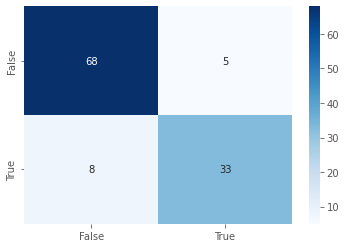

In [163]:
ax= sns.heatmap(confusion_matrix(y_test, y_pred),annot=True,cmap="Blues")
## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

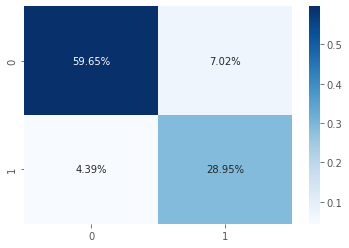

In [164]:
ax = sns.heatmap(mat/np.sum(mat), annot=True,fmt='.2%', cmap='Blues')

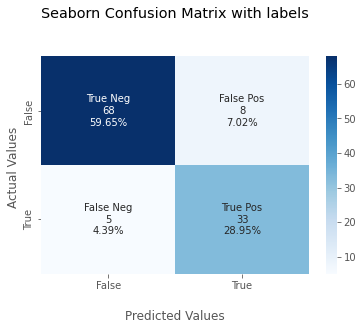

In [165]:
group_names = ['True Neg','False Pos','False Neg','True Pos']

group_counts = ["{0:0.0f}".format(value) for value in
                mat.flatten()]

group_percentages = ["{0:.2%}".format(value) for value in
                     mat.flatten()/np.sum(mat)]

labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]

labels = np.asarray(labels).reshape(2,2)

ax = sns.heatmap(mat, annot=labels, fmt='', cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

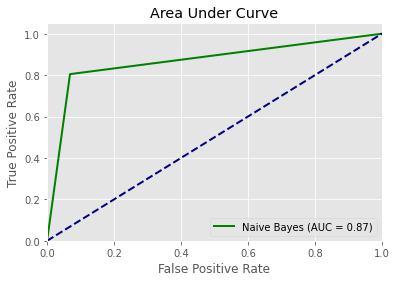

In [166]:
### Area Under the curve
fpr_dt, tpr_dt, _ = roc_curve(y_test,pred)
roc_auc_dt = auc(fpr_dt, tpr_dt)
plt.figure(1)
lw = 2
plt.plot(fpr_dt, tpr_dt, color='green',
         lw=lw, label='Naive Bayes (AUC = %0.2f)' % roc_auc_dt)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Area Under Curve')
plt.legend(loc="lower right")
plt.show()

* After Data Augmentation

In [167]:
%%time
# Init the Gaussian Classifier
model = GaussianNB()

# Train the model
model.fit(X_new_train, y_new_train)
# Predict Output 
pred = model.predict(X_new_test)

Wall time: 16 ms


[]

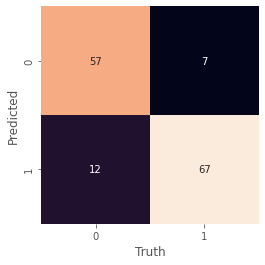

In [168]:
# Plot Confusion Matrix
# plt.figure(figsize=(10,8))
mat = confusion_matrix(pred, y_new_test)
names = np.unique(pred)
sns.heatmap(mat, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=names, yticklabels=names)
plt.xlabel('Truth')
plt.ylabel('Predicted')
plt.plot()

#### Applying Gausian Naive Bayes using GridSearchCV/

In [169]:
param_grid_nb = {
    'var_smoothing': np.logspace(0,-9, num=100)
}

In [170]:
%%time
nb_classifier = GaussianNB()

params_NB = {'var_smoothing': np.logspace(0,-9, num=100)}
gs_NB = GridSearchCV(estimator=nb_classifier, 
                 param_grid=params_NB, 
                 cv=4,   # use any cross validation technique 
                 verbose=1, 
                 scoring='accuracy') 
gs_NB.fit(X_new_train, y_new_train)
gs_NB.best_params_ 

Fitting 4 folds for each of 100 candidates, totalling 400 fits
Wall time: 3.45 s


{'var_smoothing': 1.5199110829529332e-05}

In [171]:
y_pred = gs_NB.predict(X_new_test)

In [172]:
%%time
# Decision tree with depth = 4
model_nb_score_train = gs_NB.score(X_new_train, y_new_train)
print("Training score: ",model_nb_score_train)
model_nb_score_test = gs_NB.score(X_new_test, y_new_test)
print("Testing score: ",model_nb_score_test)

Training score:  0.882661996497373
Testing score:  0.8741258741258742
Wall time: 7.98 ms


In [173]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_new_test, y_pred), ": is the confusion matrix")
from sklearn.metrics import accuracy_score
print(accuracy_score(y_new_test, y_pred), ": is the accuracy score")
from sklearn.metrics import precision_score
print(precision_score(y_new_test, y_pred), ": is the precision score")
from sklearn.metrics import recall_score
print(recall_score(y_new_test, y_pred), ": is the recall score")
from sklearn.metrics import f1_score
print(f1_score(y_new_test, y_pred), ": is the f1 score")

[[58 11]
 [ 7 67]] : is the confusion matrix
0.8741258741258742 : is the accuracy score
0.8589743589743589 : is the precision score
0.9054054054054054 : is the recall score
0.881578947368421 : is the f1 score


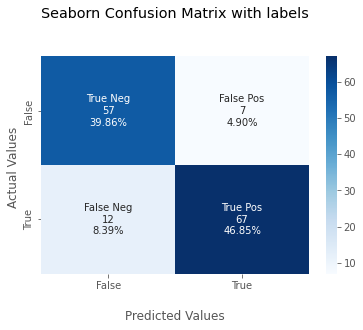

In [174]:
group_names = ['True Neg','False Pos','False Neg','True Pos']

group_counts = ["{0:0.0f}".format(value) for value in
                mat.flatten()]

group_percentages = ["{0:.2%}".format(value) for value in
                     mat.flatten()/np.sum(mat)]

labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]

labels = np.asarray(labels).reshape(2,2)

ax = sns.heatmap(mat, annot=labels, fmt='', cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

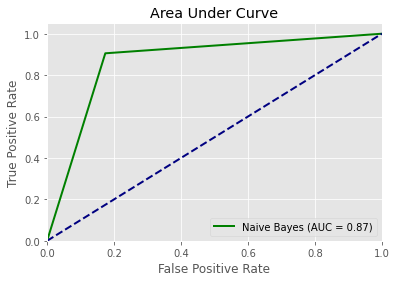

In [175]:
### Area Under the curve
fpr_dt, tpr_dt, _ = roc_curve(y_new_test,pred)
roc_auc_dt = auc(fpr_dt, tpr_dt)
plt.figure(1)
lw = 2
plt.plot(fpr_dt, tpr_dt, color='green',
         lw=lw, label='Naive Bayes (AUC = %0.2f)' % roc_auc_dt)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Area Under Curve')
plt.legend(loc="lower right")
plt.show()

##### Model 4: USING Neural Network (Shallow and Deep Network)
* Before Data Augementation

In [176]:
from sklearn.model_selection import GridSearchCV
from keras.wrappers.scikit_learn import KerasClassifier
from keras.models import Sequential
from keras.layers import Dense,Dropout
from keras.layers import LeakyReLU
import tensorflow as tf

In [183]:
#Function for Shallo Neural Network
def create_model_shallow(optimizer="adam"):
    # create model
    model = Sequential()
    model.add(Dense(200,activation='relu',input_shape=(12,))) # input layer
    model.add(Dropout(0.2))
    model.add(Dense(50, activation='relu')) #Have only one hidden layer
    model.add(Dropout(0.2))
    model.add(Dense(1, activation='sigmoid')) # Since it has 2 outputs, 'sigmoid' as activation in the output layer
    # Compile model
    model.compile(loss='binary_crossentropy', optimizer=optimizer,metrics=["accuracy"])
    return model
shallow_model = create_model_shallow() 

In [196]:
#Function for Deep Neural Network
def create_model(optimizer="adam"):
    # create model
    model = Sequential()
    model.add(Dense(200,activation='relu',input_shape=(12,)))
    model.add(Dropout(0.2))
    model.add(Dense(50, activation='relu'))
    model.add(Dropout(0.3))
    model.add(Dense(50, activation='sigmoid')) 
    model.add(Dropout(0.2))
    model.add(Dense(1, activation='sigmoid')) # Since it has 2 hidden layers, 'sigmoid' as activation in the output layer
    # Compile model 
    model.compile(loss='binary_crossentropy', optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),metrics=["accuracy"])
    return model
model = create_model() 

In [185]:
import tensorflow as tf
#Considering y variable holds numpy array
y_train = np.asarray(y_train).astype(int)
X_train = np.array(X_train).astype(int)
X_test = np.array(X_test).astype(int)
y_test = np.array(y_test).astype(int)

In [186]:
import tensorflow as tf
#Considering y variable holds numpy array
y_new_train = np.asarray(y_new_train).astype("float32")
y_new_test = np.asarray(y_new_test).astype("float32")
X_new_train = np.asarray(X_new_train).astype("float32")
X_new_test = np.asarray(X_new_test).astype("float32")

In [187]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(455, 12)
(455,)
(114, 12)
(114,)


###### Before Data Augmentation
- Shallow Network

In [188]:
#Applying Shallow NN model object to trainind data
shallow_train=shallow_model.fit(X_train, y_train, epochs=100, batch_size=100, verbose=0,validation_data=(X_test,y_test))

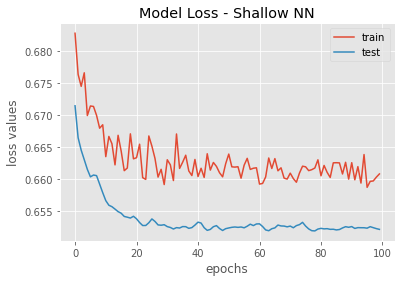

In [189]:
# plot loss during training
plt.plot(shallow_train.history['loss'], label='train')
plt.plot(shallow_train.history['val_loss'], label='test')
plt.title('Model Loss - Shallow NN')
plt.xlabel('epochs')
plt.ylabel('loss values')
plt.legend(loc='upper right')
plt.show()

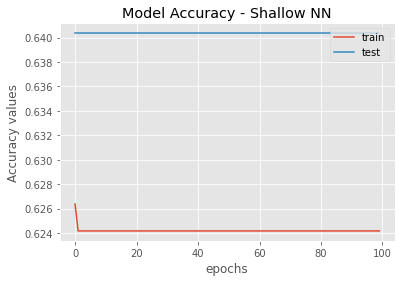

In [190]:
# plot accuracy during training
plt.plot(shallow_train.history['accuracy'], label='train')
plt.plot(shallow_train.history['val_accuracy'], label='test')
plt.title('Model Accuracy - Shallow NN')
plt.xlabel('epochs')
plt.ylabel('Accuracy values')
plt.legend(loc='upper right')
plt.show()

In [192]:
#Accuracy for Shallow Neural Network
train_acc = shallow_model.evaluate(X_train, y_train, verbose=0)
test_acc = shallow_model.evaluate(X_test, y_test, verbose=0)

print("Training score: ",round(train_acc[1]*100,2))
print("Testing score: ",round(test_acc[1]*100,2)) 

Training score:  62.42
Testing score:  64.04


In [193]:
# loss for shallow Neural Network 
train_loss = shallow_model.evaluate(X_train, y_train, verbose=1)
test_loss = shallow_model.evaluate(X_test, y_test, verbose=1)

print("Training loss: ",round(train_loss[0]*100,2))
print("Testing loss: ",round(test_loss[0]*100,2)) 

4/4 [==============================] - 0s 3ms/step - loss: 0.6522 - accuracy: 0.6404
Training loss:  66.04
Testing loss:  65.22


###### Deep Network
- Before Data Augmentation 

In [197]:
#Applying DEEP NN model object to trainind data
train=model.fit(X_train, y_train, epochs=100, batch_size=100, verbose=0,validation_data=(X_test,y_test))

###### plot loss during training
plt.plot(train.history['loss'], label='train')
plt.plot(train.history['val_loss'], label='test')
plt.title('Model Loss - Deep NN')
plt.xlabel('epochs')
plt.ylabel('loss values')
plt.legend(loc='upper right')
plt.show()

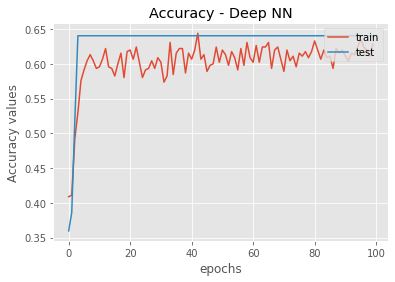

In [198]:
# plot Accuracy during training
plt.plot(train.history['accuracy'], label='train')
plt.plot(train.history['val_accuracy'], label='test')
plt.title('Accuracy - Deep NN')
plt.xlabel('epochs')
plt.ylabel('Accuracy values')
plt.legend(loc='upper right')
plt.show()

In [200]:
#Accuracy for Deep Neural Network
train_acc = model.evaluate(X_train, y_train, verbose=0)
test_acc = model.evaluate(X_test, y_test, verbose=0)

print("Training score: ",round(train_acc[1]*100,2))
print("Testing score: ",round(test_acc[1]*100,2)) 

Training score:  62.42
Testing score:  64.04


In [201]:
#Accuracy for Deep Neural Network
train_loss = model.evaluate(X_train, y_train, verbose=1)
test_loss = model.evaluate(X_test, y_test, verbose=1)

print("Training loss: ",round(train_loss[0]*100,2))
print("Testing loss: ",round(test_loss[0]*100,2)) 

4/4 [==============================] - 0s 3ms/step - loss: 0.6542 - accuracy: 0.6404
Training loss:  66.14
Testing loss:  65.42


In [202]:
# Grid Search Cross Validation
# GridSearch Cross Validation Parameters
param_grid = {
   
    'epochs': [50,100,150,200],
    'batch_size':[16,32,100,128],
    'optimizer':['RMSprop', 'Adam','SGD',"nadam"],
    
}

# create model

# Creating Model Object with KerasClassifier
model_cv = KerasClassifier(build_fn=create_model, verbose=0)


grid = GridSearchCV(estimator=model_cv,  
                    n_jobs=-1, 
                    verbose=1,
                    cv=5,
                    param_grid=param_grid)

grid_cv_model = grid.fit(X_train, y_train) # Fitting the GridSearch Object on the Train Set


means = grid_cv_model.cv_results_['mean_test_score'] # Mean of test scores
stds = grid_cv_model.cv_results_['std_test_score'] # standard deviations of test scores
params = grid_cv_model.cv_results_['params'] # parameters used
# to print all scores, standard deviations and parameters used
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

# Printing the Best Parameters as a Result of Grid Search Cross Validation on the Screen
print("Best: %f using %s" % (grid_cv_model.best_score_, grid_cv_model.best_params_))

Fitting 5 folds for each of 64 candidates, totalling 320 fits
0.624176 (0.058314) with: {'batch_size': 16, 'epochs': 50, 'optimizer': 'RMSprop'}
0.624176 (0.058314) with: {'batch_size': 16, 'epochs': 50, 'optimizer': 'Adam'}
0.624176 (0.058314) with: {'batch_size': 16, 'epochs': 50, 'optimizer': 'SGD'}
0.624176 (0.058314) with: {'batch_size': 16, 'epochs': 50, 'optimizer': 'nadam'}
0.624176 (0.058314) with: {'batch_size': 16, 'epochs': 100, 'optimizer': 'RMSprop'}
0.624176 (0.058314) with: {'batch_size': 16, 'epochs': 100, 'optimizer': 'Adam'}
0.624176 (0.058314) with: {'batch_size': 16, 'epochs': 100, 'optimizer': 'SGD'}
0.624176 (0.058314) with: {'batch_size': 16, 'epochs': 100, 'optimizer': 'nadam'}
0.624176 (0.058314) with: {'batch_size': 16, 'epochs': 150, 'optimizer': 'RMSprop'}
0.624176 (0.058314) with: {'batch_size': 16, 'epochs': 150, 'optimizer': 'Adam'}
0.624176 (0.058314) with: {'batch_size': 16, 'epochs': 150, 'optimizer': 'SGD'}
0.624176 (0.058314) with: {'batch_size': 16

In [203]:
# %% Model Tuning- Building a Tuned Model with Best Parameters
# Creating Tuned Model Object with KerasClassifier
cv_model = grid_cv_model.best_estimator_

In [205]:
#%% K-FOLD
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
# K-fold accuracy scores

kfold = KFold(n_splits=5, shuffle=True)
results = cross_val_score(cv_model, X_test, y_test, cv=kfold,scoring= 'accuracy')

In [206]:
print('K-fold Cross Validation Accuracy Results: ', results)
print('K-fold Cross Validation Accuracy Results Mean: ', results.mean())

K-fold Cross Validation Accuracy Results:  [0.60869565 0.65217391 0.69565217 0.69565217 0.54545455]
K-fold Cross Validation Accuracy Results Mean:  0.6395256916996048


In [208]:
# Tuned Model Prediction

y_pred = cv_model.predict(X_test)

In [210]:
import sklearn.metrics as metrics
print("f1_weighted:",metrics.f1_score(y_test, y_pred,average='weighted'))
# %% Accuracy
print("accuracy:",metrics.accuracy_score(y_test, y_pred))

f1_weighted: 0.4999530912843606
accuracy: 0.6403508771929824


In [211]:
# Classification Report
model_report = classification_report(y_test, y_pred)
print(model_report)

              precision    recall  f1-score   support

           0       0.64      1.00      0.78        73
           1       0.00      0.00      0.00        41

    accuracy                           0.64       114
   macro avg       0.32      0.50      0.39       114
weighted avg       0.41      0.64      0.50       114



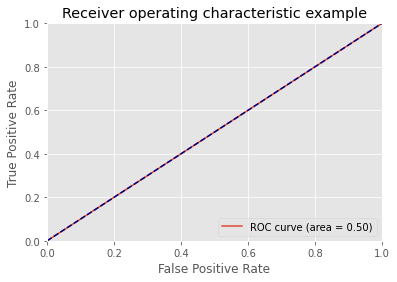

In [212]:
#%% ROC-AUC Curve
import matplotlib.pyplot as plt

probs=cv_model.predict_proba(X_test)
fpr,tpr,threshold=metrics.roc_curve(y_test,y_pred)
roc_auc=metrics.auc(fpr,tpr)

plt.title("ROC")
plt.plot(fpr,tpr,label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy',  linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

###### After Data Augmentation
- Shallow learning 

In [213]:
#Applying Shallow NN model object to trainind data
shallow_train=shallow_model.fit(X_new_train,y_new_train, epochs=100, batch_size=100, verbose=0,validation_data=(X_new_test,y_new_test))

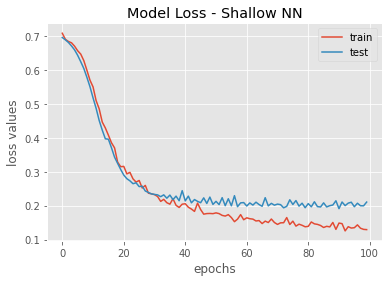

In [214]:
# plot loss during training
plt.plot(shallow_train.history['loss'], label='train')
plt.plot(shallow_train.history['val_loss'], label='test')
plt.title('Model Loss - Shallow NN')
plt.xlabel('epochs')
plt.ylabel('loss values')
plt.legend(loc='upper right')
plt.show()

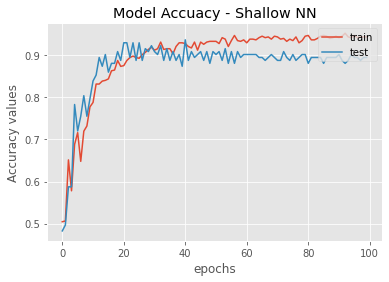

In [215]:
# plot accuracy during training
plt.plot(shallow_train.history['accuracy'], label='train')
plt.plot(shallow_train.history['val_accuracy'], label='test')
plt.title('Model Accuacy - Shallow NN')
plt.xlabel('epochs')
plt.ylabel('Accuracy values')
plt.legend(loc='upper right')
plt.show()

In [216]:
#Accuracy for Shallow Neural Network
train_acc = shallow_model.evaluate(X_new_train, y_new_train, verbose=1)
test_acc = shallow_model.evaluate(X_new_test, y_new_test, verbose=1)

print("Training score: ",round(train_acc[1]*100,2))
print("Testing score: ",round(test_acc[1]*100,2)) 

5/5 [==============================] - 0s 3ms/step - loss: 0.2105 - accuracy: 0.8951
Training score:  94.92
Testing score:  89.51


In [217]:
# loss for shallow Neural Network 
train_loss = shallow_model.evaluate(X_new_train, y_new_train, verbose=1)
test_loss = shallow_model.evaluate(X_new_test, y_new_test, verbose=1)

print("Training loss: ",round(train_loss[0]*100,2)) 
print("Testing loss: ",round(test_loss[0]*100,2)) 

5/5 [==============================] - 0s 3ms/step - loss: 0.2105 - accuracy: 0.8951
Training loss:  12.35
Testing loss:  21.05


* Deep Learning 

In [218]:
#Applying DEEP NN model object to trainind data
train=model.fit(X_new_train, y_new_train, epochs=100, batch_size=100, verbose=0,validation_data=(X_new_test,y_new_test))

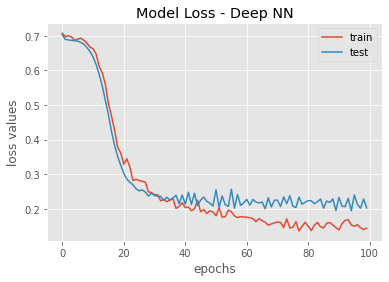

In [219]:
# plot loss during training
plt.plot(train.history['loss'], label='train')
plt.plot(train.history['val_loss'], label='test')
plt.title('Model Loss - Deep NN')
plt.xlabel('epochs')
plt.ylabel('loss values')
plt.legend(loc='upper right')
plt.show()

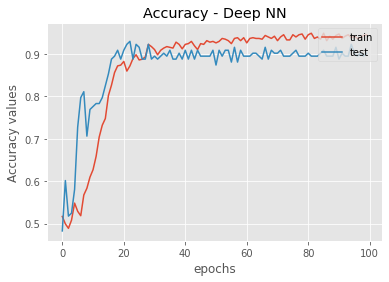

In [220]:
# plot Accuracy during training
plt.plot(train.history['accuracy'], label='train')
plt.plot(train.history['val_accuracy'], label='test')
plt.title('Accuracy - Deep NN')
plt.xlabel('epochs')
plt.ylabel('Accuracy values')
plt.legend(loc='upper right')
plt.show()

In [221]:
#Accuracy for Deep Neural Network
train_acc = model.evaluate(X_new_train, y_new_train, verbose=1)
test_acc = model.evaluate(X_new_test, y_new_test, verbose=1)

print("Training score: ",round(train_acc[1]*100,2))
print("Testing score: ",round(test_acc[1]*100,2)) 

5/5 [==============================] - 0s 3ms/step - loss: 0.2030 - accuracy: 0.9021
Training score:  94.75
Testing score:  90.21


In [222]:
#Accuracy for Deep Neural Network
train_loss = model.evaluate(X_new_train, y_new_train, verbose=1)
test_loss = model.evaluate(X_new_test, y_new_test, verbose=1)

print("Training loss: ",round(train_loss[0]*100,2))
print("Testing loss: ",round(test_loss[0]*100,2))

5/5 [==============================] - 0s 3ms/step - loss: 0.2030 - accuracy: 0.9021
Training loss:  12.48
Testing loss:  20.3


In [223]:
# Grid Search Cross Validation
# GridSearch Cross Validation Parameters
param_grid = {
   
    'epochs': [50,100,150,200],
    'batch_size':[16,32,100,128],
    'optimizer':['RMSprop', 'Adam','SGD',"nadam"],
    
}

# create model

# Creating Model Object with KerasClassifier
model_cv = KerasClassifier(build_fn=create_model, verbose=0)


grid = GridSearchCV(estimator=model_cv,  
                    n_jobs=-1, 
                    verbose=1,
                    cv=5,
                    param_grid=param_grid)

grid_cv_model = grid.fit(X_new_train, y_new_train,) # Fitting the GridSearch Object on the Train Set


means = grid_cv_model.cv_results_['mean_test_score'] # Mean of test scores
stds = grid_cv_model.cv_results_['std_test_score'] # standard deviations of test scores
params = grid_cv_model.cv_results_['params'] # parameters used
# to print all scores, standard deviations and parameters used
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

# Printing the Best Parameters as a Result of Grid Search Cross Validation on the Screen
print("Best: %f using %s" % (grid_cv_model.best_score_, grid_cv_model.best_params_))

Fitting 5 folds for each of 64 candidates, totalling 320 fits
0.940458 (0.015081) with: {'batch_size': 16, 'epochs': 50, 'optimizer': 'RMSprop'}
0.931716 (0.008429) with: {'batch_size': 16, 'epochs': 50, 'optimizer': 'Adam'}
0.921159 (0.022957) with: {'batch_size': 16, 'epochs': 50, 'optimizer': 'SGD'}
0.931686 (0.008684) with: {'batch_size': 16, 'epochs': 50, 'optimizer': 'nadam'}
0.943982 (0.010365) with: {'batch_size': 16, 'epochs': 100, 'optimizer': 'RMSprop'}
0.945721 (0.012836) with: {'batch_size': 16, 'epochs': 100, 'optimizer': 'Adam'}
0.942227 (0.011775) with: {'batch_size': 16, 'epochs': 100, 'optimizer': 'SGD'}
0.940458 (0.011623) with: {'batch_size': 16, 'epochs': 100, 'optimizer': 'nadam'}
0.936964 (0.006437) with: {'batch_size': 16, 'epochs': 150, 'optimizer': 'RMSprop'}
0.947475 (0.011013) with: {'batch_size': 16, 'epochs': 150, 'optimizer': 'Adam'}
0.945721 (0.017851) with: {'batch_size': 16, 'epochs': 150, 'optimizer': 'SGD'}
0.942227 (0.013016) with: {'batch_size': 16

In [225]:
# %% Model Tuning- Building a Tuned Model with Best Parameters
# Creating Tuned Model Object with KerasClassifier
cv_model = grid_cv_model.best_estimator_

In [226]:
#%% K-FOLD
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
# K-fold accuracy scores

kfold = KFold(n_splits=5, shuffle=True)
results = cross_val_score(cv_model, X_new_test, y_new_test, cv=kfold,scoring= 'accuracy')

In [227]:
print('K-fold Cross Validation Accuracy Results: ', results)
print('K-fold Cross Validation Accuracy Results Mean: ', results.mean())

K-fold Cross Validation Accuracy Results:  [0.89655172 0.96551724 0.96551724 0.78571429 0.85714286]
K-fold Cross Validation Accuracy Results Mean:  0.894088669950739


In [228]:
# Tuned Model Prediction

y_pred = cv_model.predict(X_new_test)

In [229]:
import sklearn.metrics as metrics
print("f1_weighted:",metrics.f1_score(y_new_test, y_pred,average='weighted'))
# %% Accuracy
print("accuracy:",metrics.accuracy_score(y_new_test, y_pred))

f1_weighted: 0.9159355962183927
accuracy: 0.916083916083916


In [230]:
# Classification Report
model_report = classification_report(y_new_test, y_pred)
print(model_report)

              precision    recall  f1-score   support

         0.0       0.94      0.88      0.91        69
         1.0       0.90      0.95      0.92        74

    accuracy                           0.92       143
   macro avg       0.92      0.92      0.92       143
weighted avg       0.92      0.92      0.92       143



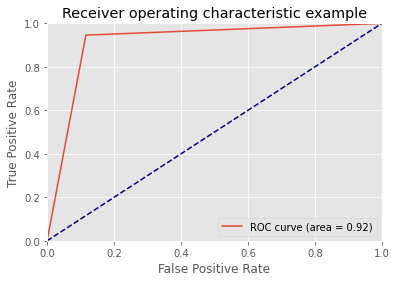

In [231]:
#%% ROC-AUC Curve
import matplotlib.pyplot as plt

probs=cv_model.predict_proba(X_new_test)
fpr,tpr,threshold=metrics.roc_curve(y_new_test,y_pred)
roc_auc=metrics.auc(fpr,tpr)

plt.title("ROC")
plt.plot(fpr,tpr,label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy',  linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()